In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("final_psafe_dataset.csv")

In [3]:
df

,rid,scenario,mode,psafe,type,pav,obst,cross,veh,bike,...,car_own,moto_own,bike_own,escooter_own,car_frequency,bike_frequency,escooter_frequency,PT_frequency,metro_frequency,young
0,101,scenario11,car,6,1,1,0,0,100,90,...,1,0,1,1.0,3,2,1,3,4,0
1,102,scenario11,car,4,1,1,0,0,100,90,...,0,0,1,0.0,1,2,1,1,4,1
2,103,scenario11,car,5,1,1,0,0,100,90,...,0,0,0,0.0,1,1,1,4,4,1
3,104,scenario11,car,6,1,1,0,0,100,90,...,1,1,1,0.0,4,2,1,3,4,1
4,105,scenario11,car,5,1,1,0,0,100,90,...,1,0,1,0.0,2,2,1,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,313,scenario4,walk,3,4,0,1,0,60,50,...,1,0,1,0.0,1,1,1,3,4,1
2396,314,scenario4,walk,2,4,0,1,0,60,50,...,1,0,0,0.0,2,1,1,3,4,1
2397,315,scenario4,walk,1,4,0,1,0,60,50,...,1,0,1,0.0,2,2,1,1,2,1
2398,316,scenario4,walk,3,4,0,1,0,60,50,...,1,0,1,0.0,4,1,3,1,4,1


In [ ]:
df["type"] = df["type"].replace({3: "Type 3", 1: "Type 1", 2: "Type 2", 4: "Type 4"})


In [ ]:
female_df = df[df["gender"] == 0]
male_df = df[df["gender"] == 1]
young_df = df[df["age"].isin([1, 2])]
not_young_df = df[df["age"].isin([3, 4, 5, 6])]

In [ ]:
modes = ["walk", "escooter", "ebike", "car"]
colors = ["steelblue", "lightblue", "orange", "red"]

In [ ]:
scenario_types = df["type"].unique()

In [8]:
scenario_types = sorted(scenario_types)

In [ ]:
groups = [female_df, male_df, not_young_df, young_df]
group_names = ["Female Respondents", "Male Respondents", "Not Young Respondents", "Young Respondents"]


In [10]:
psafe_order = [1, 2, 3, 4, 5, 6, 7]

C:\Users\Hasan Can Buldu\AppData\Local\Temp\ipykernel_20888\1912563100.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["psafe"] = pd.Categorical(subset["psafe"], categories=psafe_order, ordered=True)
C:\Users\Hasan Can Buldu\AppData\Local\Temp\ipykernel_20888\1912563100.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["psafe"] = pd.Categorical(subset["psafe"], categories=psafe_order, ordered=True)
C:\Users\Hasan Can Buldu\AppData\Local\Temp\ipykernel_20888\1912563100.py:15: SettingWit

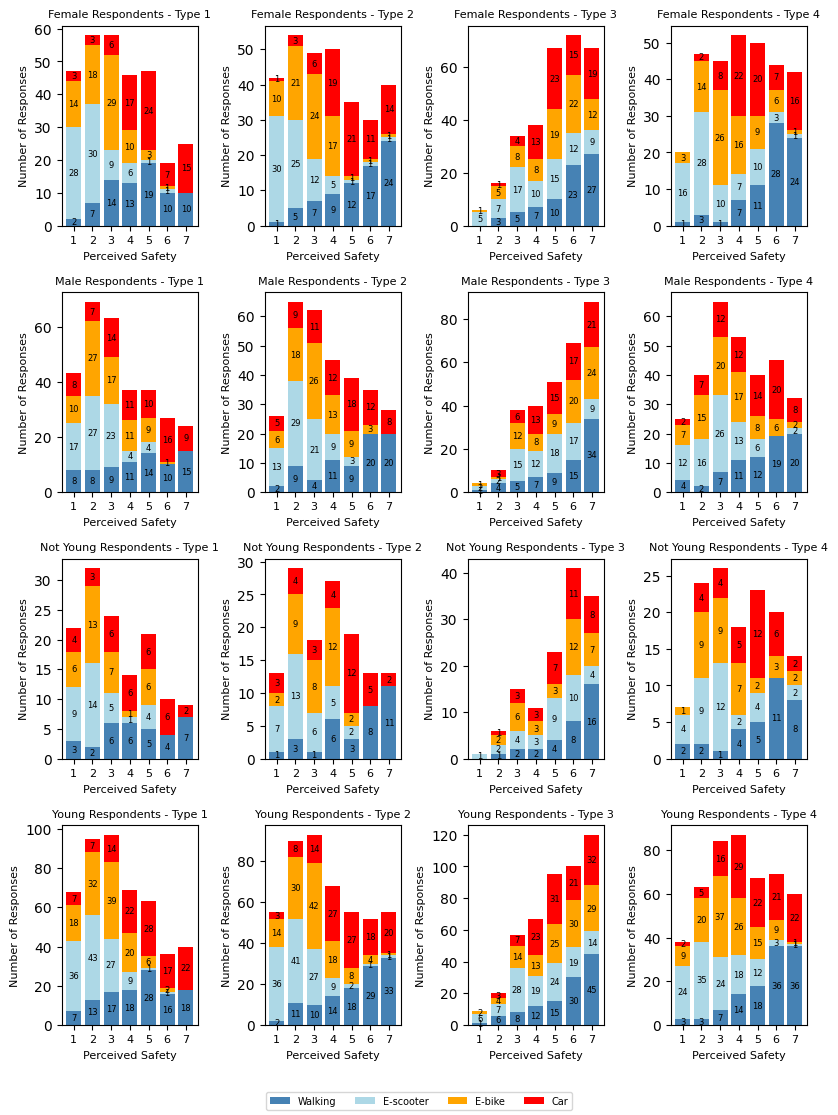

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8.27, 11.5))

for row, (df_group, group_name) in enumerate(zip(groups, group_names)):
    for col, scenario_type in enumerate(scenario_types):
        ax = axes[row, col]

        data = pd.DataFrame()
        for mode in modes:
            subset = df_group[df_group["type"] == scenario_type]
            
            subset["psafe"] = pd.Categorical(subset["psafe"], categories=psafe_order, ordered=True)
            
            mode_counts = subset[subset["mode"] == mode]["psafe"].value_counts().reindex(psafe_order, fill_value=0)
            mode_counts = mode_counts.rename(mode)  
            data = pd.concat([data, mode_counts], axis=1)

        data = data.fillna(0)

        data.plot(kind="bar", stacked=True, color=colors, width=0.8, ax=ax, legend=False)

        for i, psafe_level in enumerate(data.index):
            cumulative_height = 0  
            for j, mode in enumerate(modes):
                value = data.loc[psafe_level, mode]
                if value > 0:  
                    ax.text(i, cumulative_height + value / 2, str(int(value)),
                            ha="center", va="center", fontsize=6, color="black")
                    cumulative_height += value  

        ax.set_xlabel("Perceived Safety")
        ax.set_ylabel("Number of Responses")
        ax.set_title(f"{group_name} - {scenario_type}", fontsize=8)
        ax.set_xticklabels(data.index.astype(str), rotation=0, fontsize=8)
        ax.set_xlabel("Perceived Safety", fontsize=8)
        ax.set_ylabel("Number of Responses", fontsize=8)

legend_labels = ["Walking", "E-scooter", "E-bike", "Car"]
plt.figlegend(legend_labels, loc="lower center", ncol=4, fontsize=7)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.savefig("type_safety_graphs.png", dpi=600)
plt.show()

In [ ]:
modes = ["car", "ebike", "escooter", "walk"]
densities = {
    "veh": [100, 60, 20],  
    "bike": [90, 50, 10],  
    "ped": [25, 15, 5]  
}

In [ ]:

psafe_values = list(reversed([1, 2, 3, 4, 5, 6, 7]))  
colors = list(reversed(['red', 'orange', 'gold', 'lemonchiffon', 'lightcyan', 'turquoise', 'blue']))

C:\Users\Hasan Can Buldu\AppData\Local\Temp\ipykernel_20888\1879461782.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.95])


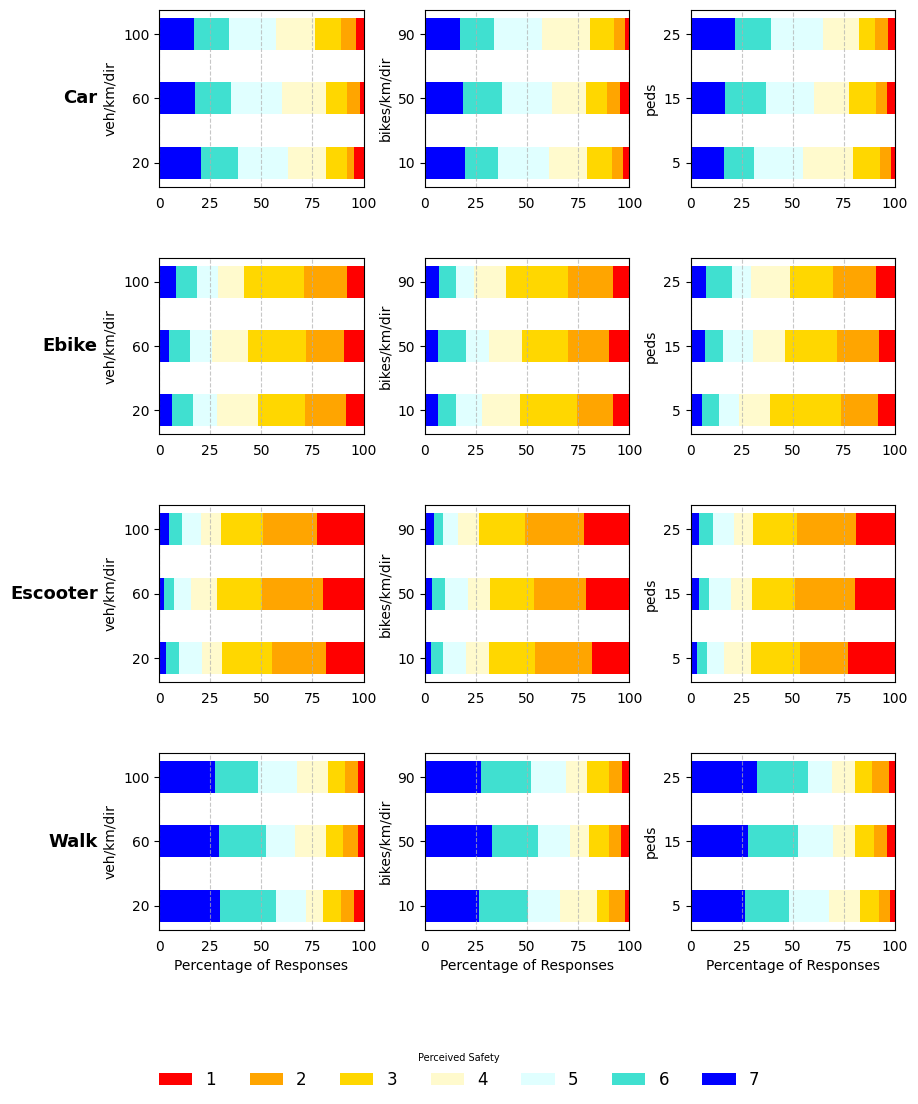

In [ ]:
from matplotlib.patches import Patch

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(8.27, 11.5), gridspec_kw={'hspace': 0.4, 'wspace': 0.3})

for row, mode in enumerate(modes):
    for col, (density_label, density_levels) in enumerate(densities.items()):
        ax = axes[row, col]

        density_levels_sorted = sorted(density_levels, reverse=False)

        stacked_data = []
        for density in density_levels_sorted:
            subset = df[(df["mode"] == mode) & (df[density_label] == density)]
            psafe_counts = subset["psafe"].value_counts().reindex(psafe_values, fill_value=0)
            percentages = (psafe_counts / psafe_counts.sum() * 100) if psafe_counts.sum() > 0 else np.zeros(len(psafe_values))
            stacked_data.append(percentages)

        stacked_data = np.array(stacked_data)

        bars = ax.barh(range(3), stacked_data[:, 0], color=colors[0], height=0.5)
        for i in range(1, len(psafe_values)):
            bars = ax.barh(range(3), stacked_data[:, i], left=stacked_data[:, :i].sum(axis=1), color=colors[i], height=0.5)

        ax.set_xlim(0, 100)
        if row == 3:
            ax.set_xlabel("Percentage of Responses", fontsize=10)

        ax.set_yticks(range(3))
        ax.set_yticklabels(density_levels_sorted, fontsize=10)

        ax.set_ylabel(density_label, fontsize=6)

        ax.tick_params(axis='x', which='both', bottom=False, top=False)
        ax.grid(axis="x", linestyle="--", alpha=0.7)

    axes[row, 0].annotate(mode.capitalize(),
                      xy=(-0.3, 0.5), 
                      xycoords='axes fraction',
                      fontsize=13, fontweight='bold',
                      ha='right', va='center', rotation=0)

    axes[row, 0].set_ylabel("veh/km/dir", fontsize=10)
    axes[row, 1].set_ylabel("bikes/km/dir", fontsize=10)
    axes[row, 2].set_ylabel("peds", fontsize=10)

psafe_labels = [str(val) for val in sorted(psafe_values)]
psafe_colors = [colors[i] for i in reversed(range(len(psafe_values)))]
legend_handles = [Patch(facecolor=color, label=label) for color, label in zip(psafe_colors, psafe_labels)]

fig.legend(handles=legend_handles, title="Perceived Safety", ncol=7,
           frameon=False, loc='lower center', fontsize=12, title_fontsize=7)

plt.subplots_adjust(left=0.08, right=0.97, top=0.95, bottom=0.15, wspace=0.25, hspace=0.4)
plt.tight_layout(rect=[0, 0.04, 1, 0.95])
plt.savefig("psafe_stacked_bars.png", dpi=600)
plt.show()